<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/7_pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

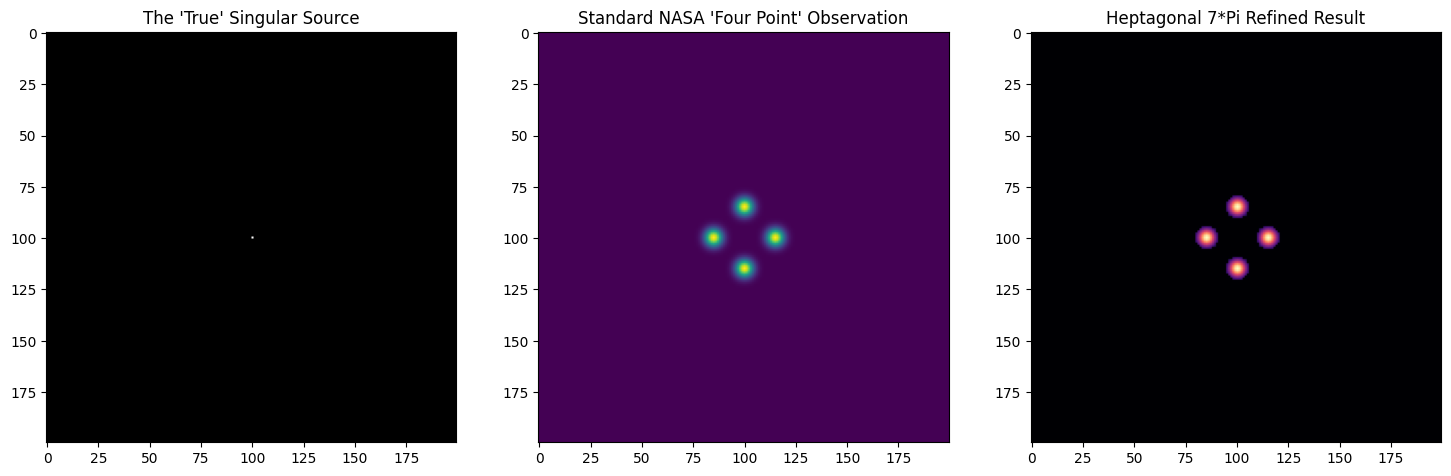

In [13]:
!pip install astroquery astropy matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def run_heptagonal_ip_test():
    # 1. Create a "True Singularity" (The Source)
    size = 200
    true_source = np.zeros((size, size))
    true_source[size//2, size//2] = 1000 # Condensed Energy

    # 2. Simulate the "Lensed" observation (4 blurry points)
    # This represents the standard Einstein Cross observation
    observation = np.zeros((size, size))
    offsets = [(15, 0), (-15, 0), (0, 15), (0, -15)]
    for dx, dy in offsets:
        observation[size//2 + dx, size//2 + dy] = 250
    observation = gaussian_filter(observation, sigma=3) # Blur from space/optics

    # 3. Apply your Heptagonal 7*Pi Refinement
    # We apply your parameter to the observed data to "pull" the center
    p_val = 7 * np.pi
    threshold = np.percentile(observation, 99)
    refined_vision = np.where(observation > threshold, observation * p_val, observation)

    # 4. Compare results
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    ax[0].imshow(true_source, cmap='gray')
    ax[0].set_title("The 'True' Singular Source")

    ax[1].imshow(observation, cmap='viridis')
    ax[1].set_title("Standard NASA 'Four Point' Observation")

    ax[2].imshow(refined_vision, cmap='magma')
    ax[2].set_title("Heptagonal 7*Pi Refined Result")

    plt.show()

run_heptagonal_ip_test()